In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import random
import os
import scanpy as sc
from scipy.sparse import csr_matrix

# Set working directory and read the AnnData object
os.chdir("P:/Tolulope/Cellranger Results/YNO")
adata = sc.read_h5ad('integrated OLD.h5ad')


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


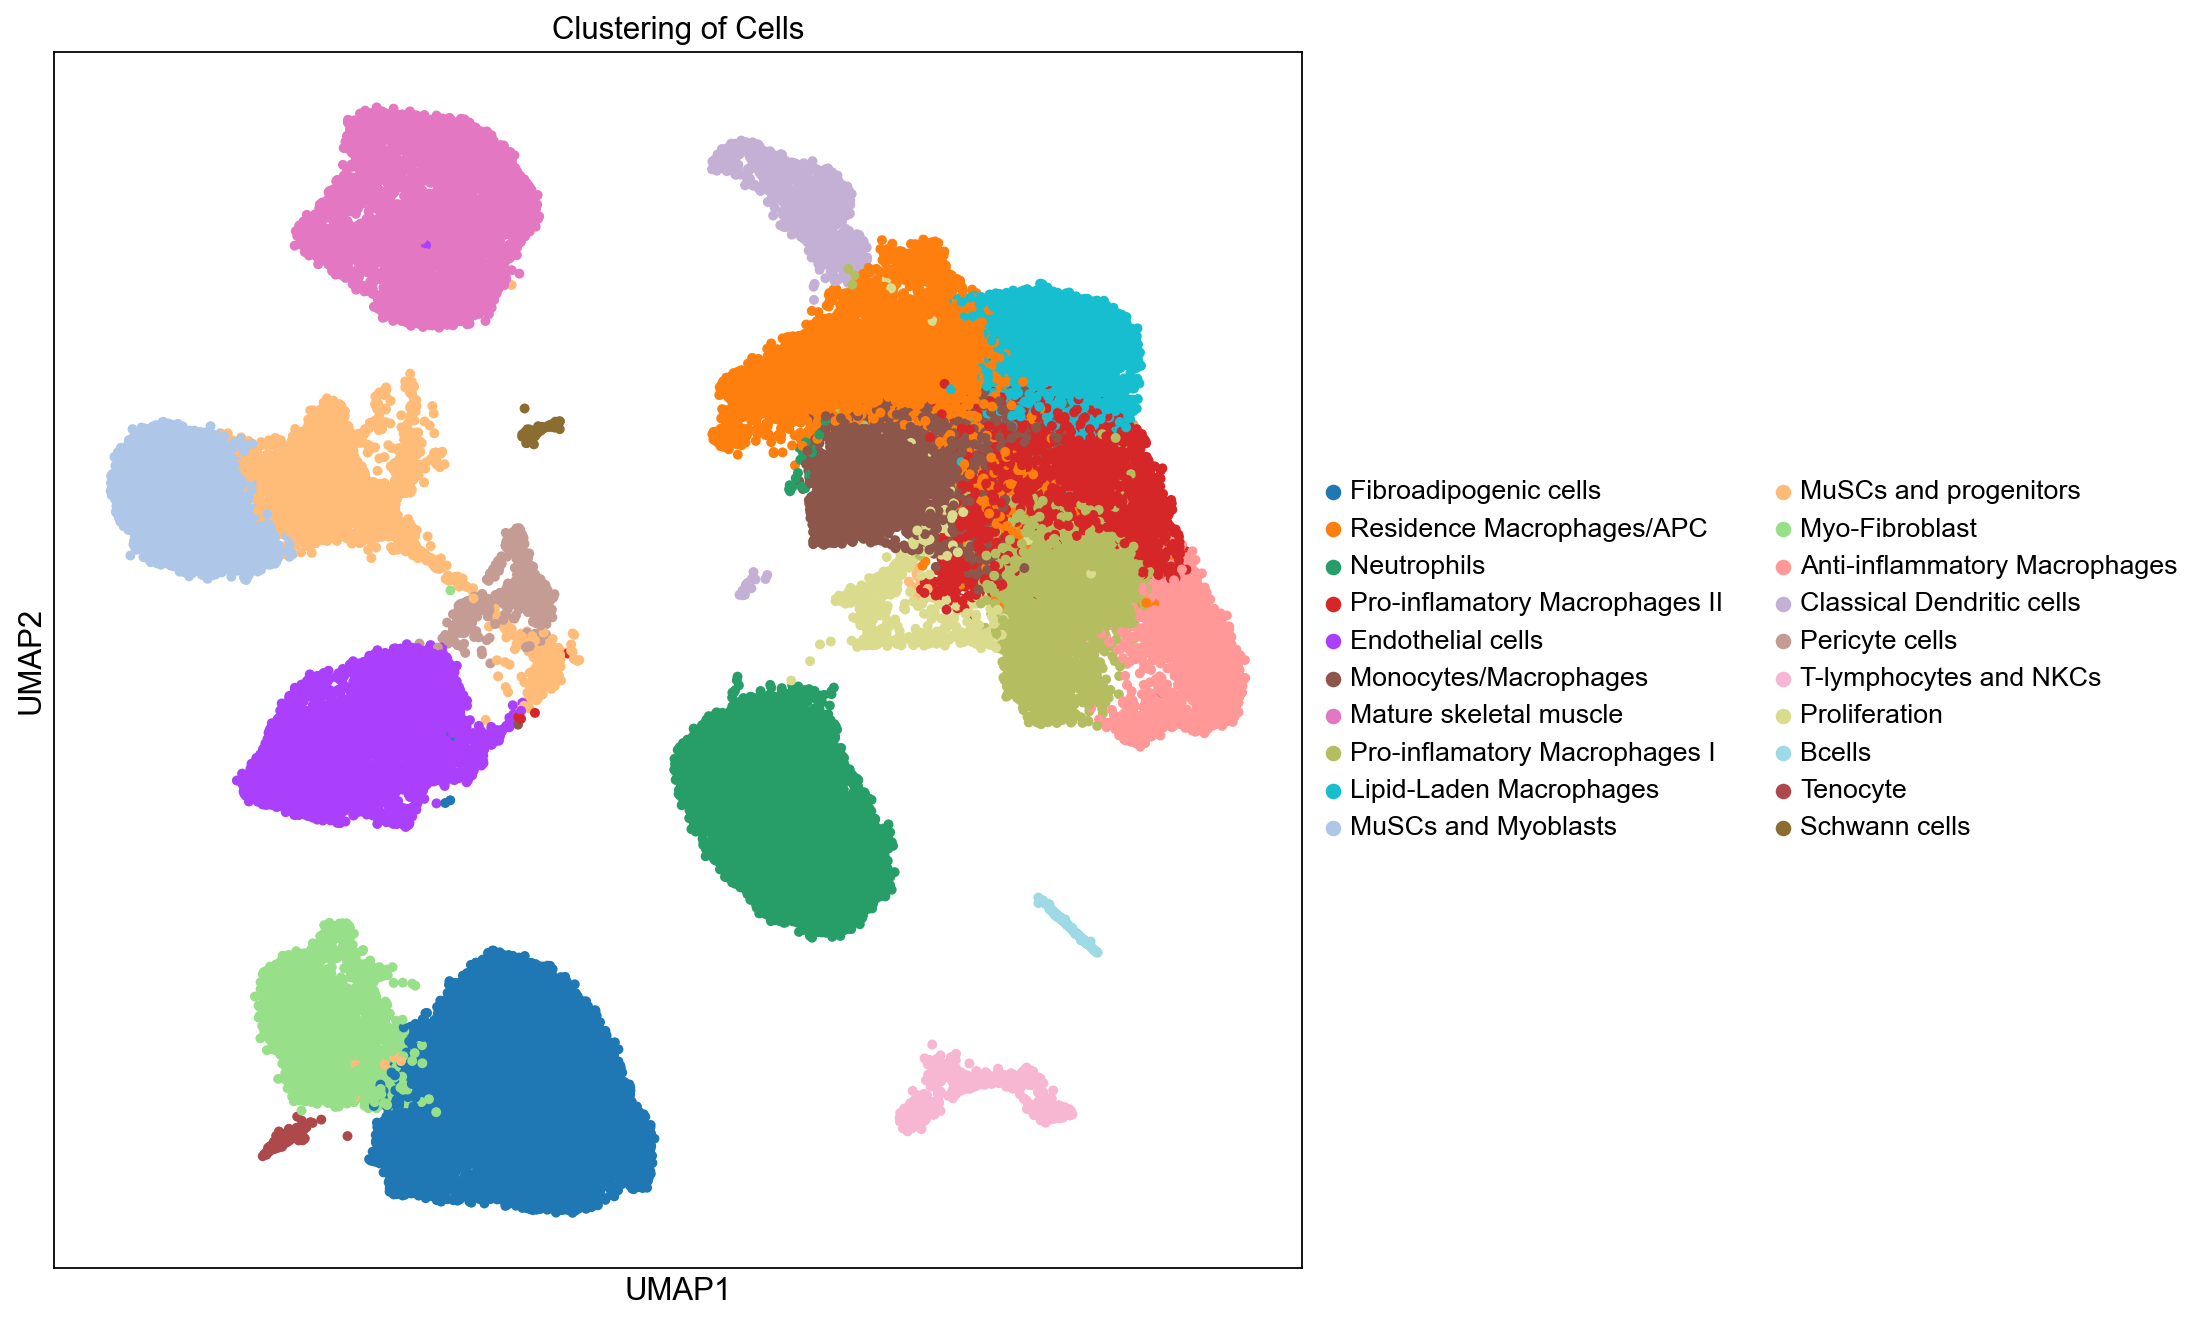

In [2]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
plt.show()


In [2]:
# Subset by condition (YOV-GFP, AOV-GFP)
subset_adata = adata[adata.obs['condition'].isin(['YOV-GFP', 'AOV-GFP'])].copy()

# Check unique conditions
print(f"Unique conditions in subset: {subset_adata.obs['condition'].unique()}")

# Subset by cell types
cell_types = ["Lipid-Laden Macrophages", "Residence Macrophages/APC", 
              "Pro-inflamatory Macrophages I", "Pro-inflamatory Macrophages II", 
              "Monocytes/Macrophages"]

cell_subset_adata = subset_adata[subset_adata.obs['cell type'].isin(cell_types)].copy()

# Convert expression matrix to CSR format for memory and computation efficiency
cell_subset_adata.X = csr_matrix(cell_subset_adata.X)


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Unique conditions in subset: ['YOV-GFP', 'AOV-GFP']
Categories (2, object): ['YOV-GFP', 'AOV-GFP']


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
# Perform differential gene expression analysis by condition
sc.tl.rank_genes_groups(cell_subset_adata, groupby='condition', reference='YOV-GFP')

In [4]:
# Define marker genes for each cell type
marker_genes_dict = {
    'Lipid-Laden Macrophages': ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a'],
    'Residence Macrophages/APC': ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a'],
    'Pro-inflamatory Macrophages I': ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a'],
    'Pro-inflamatory Macrophages II': ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a'],
    'Monocytes/Macrophages': ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a'],
}

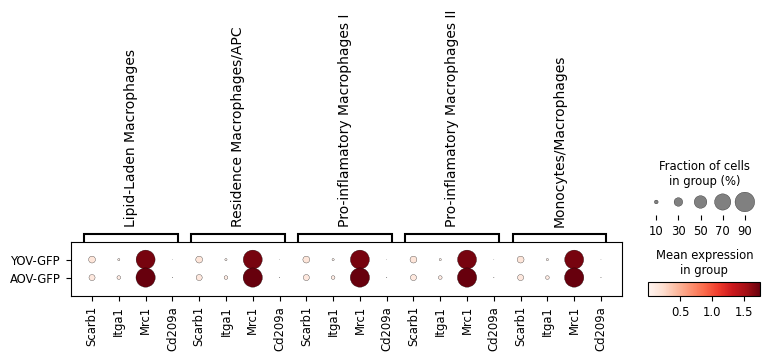

In [5]:
# Generate dot plot
sc.pl.dotplot(cell_subset_adata, marker_genes_dict, groupby='condition', dendrogram=True, save='dotplot_Mesen.png')

In [7]:
# Print out the keys to see how the data is structured
print(differential_results.keys())


dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])


In [8]:
# Print out the names of the top genes from the differential expression results
print(differential_results['names'])  # This will show the gene names in the results


[('Acod1',) ('mt-Nd3',) ('Gm15726',) ... ('Rpl13',) ('Rps27a',) ('Rpl10',)]


In [9]:
# Check if your genes of interest are in the differential expression results
genes_of_interest = ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a']
for gene in genes_of_interest:
    found_gene = False
    # Loop through the names to check if the gene is in the results
    for condition in differential_results['names'].dtype.names:
        if gene in differential_results['names'][condition]:
            found_gene = True
            idx = differential_results['names'][condition].tolist().index(gene)
            logfc = differential_results['logfoldchanges'][condition][idx]
            pval = differential_results['pvals'][condition][idx]
            print(f"{gene} - Log Fold Change: {logfc}, P-value: {pval}")
    if not found_gene:
        print(f"{gene} was not found in the differential expression results.")

Scarb1 - Log Fold Change: -0.2904357612133026, P-value: 0.0006797452528599638
Itga1 - Log Fold Change: 1.3079875707626343, P-value: 1.7223276778329669e-22
Mrc1 - Log Fold Change: 0.10765297710895538, P-value: 0.01016258822270296
Cd209a - Log Fold Change: 1.8657830953598022, P-value: 0.0013911165688064385


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Unique conditions in subset: ['YOV-GFP', 'AOV-GFP']
Categories (2, object): ['YOV-GFP', 'AOV-GFP']


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


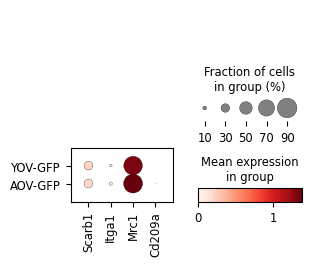

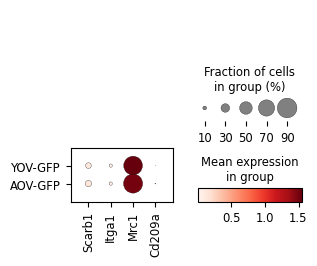

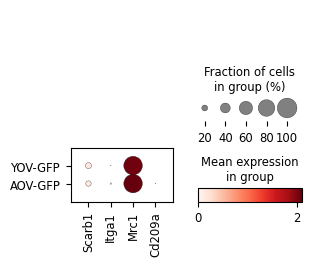

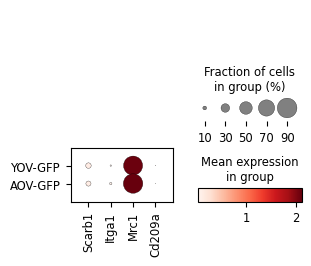

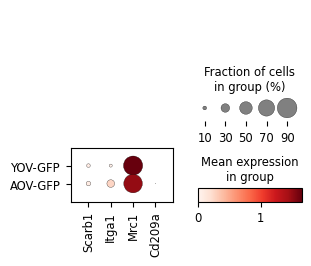

Differential expression results for Lipid-Laden Macrophages:
{'params': {'groupby': 'condition', 'reference': 'YOV-GFP', 'method': 't-test', 'use_raw': True, 'layer': None, 'corr_method': 'benjamini-hochberg'}, 'names': rec.array([('mt-Atp6',), ('mt-Nd3',), ('mt-Co3',), ..., ('Rpl13',),
           ('Rps8',), ('Rpl10',)],
          dtype=[('AOV-GFP', 'O')]), 'scores': rec.array([( 31.037477,), ( 30.663898,), ( 30.288774,), ...,
           (-24.644611,), (-25.314013,), (-27.871511,)],
          dtype=[('AOV-GFP', '<f4')]), 'pvals': rec.array([(2.31992105e-161,), (1.99508595e-162,), (1.00733705e-155,),
           ..., (3.93407973e-116,), (2.78702996e-121,),
           (2.89720737e-144,)],
          dtype=[('AOV-GFP', '<f8')]), 'pvals_adj': rec.array([(2.62046683e-157,), (4.50709867e-158,), (7.58558375e-152,),
           ..., (1.48124659e-112,), (1.25923587e-117,),
           (1.63627029e-140,)],
          dtype=[('AOV-GFP', '<f8')]), 'logfoldchanges': rec.array([( 1.1449518 ,), ( 1.801848

In [14]:
import scanpy as sc
from scipy.sparse import csr_matrix

# Subset by condition (YOV-GFP, AOV-GFP)
subset_adata = adata[adata.obs['condition'].isin(['YOV-GFP', 'AOV-GFP'])].copy()

# Check unique conditions
print(f"Unique conditions in subset: {subset_adata.obs['condition'].unique()}")

# Subset by cell types
cell_types = ["Lipid-Laden Macrophages", "Residence Macrophages/APC", 
              "Pro-inflamatory Macrophages I", "Pro-inflamatory Macrophages II", 
              "Monocytes/Macrophages"]

cell_subset_adata = subset_adata[subset_adata.obs['cell type'].isin(cell_types)].copy()

# Convert expression matrix to CSR format for memory and computation efficiency
cell_subset_adata.X = csr_matrix(cell_subset_adata.X)

# List of genes of interest
genes_of_interest = ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a']

# Store results for later use
degs = {}

# Loop through each cell type and perform differential expression analysis
for cell_type in cell_types:
    # Subset the data for the current cell type
    cell_type_adata = cell_subset_adata[cell_subset_adata.obs['cell type'] == cell_type].copy()
    
    # Perform differential gene expression analysis by condition
    sc.tl.rank_genes_groups(cell_type_adata, groupby='condition', reference='YOV-GFP')
    
    # Store the differential expression results
    degs[cell_type] = cell_type_adata.uns['rank_genes_groups']

    # Visualize with a dotplot for the genes of interest
    sc.pl.rank_genes_groups_dotplot(cell_type_adata, 
                                    var_names=genes_of_interest, 
                                    groupby='condition', 
                                    show=True)

# Check and print the differential expression results for each cell type
for cell_type, deg in degs.items():
    print(f"Differential expression results for {cell_type}:")
    print(deg)


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Your cell_type dictionary
cell_type = {
    "0": "C1q+ M2-like macrophages",
    "1": "Fibroadipogenic cells 1",
    "2": "Monocytes/Spp1+ macrophages/Platelet",
    "3": "Mature Type IIB fiber",
    "4": "Myo-Fibroblast",
    "5": "MuSCs and Myoblasts",
    "6": "Endothelial cells",
    "7": "Activated MuSCs and myogenic progenitor cells",
    "8": "Monocyte/Residence Macrophages/APC",
    "9": "Mature Type IIA fiber",
    "10": "Neutrophils",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "M2 Macrophages",
    "14": "Mature myocytes",
    "15": "T-lymphocytes and Natural killer cells",
    "16": "Pericyte cells",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Neutrophils, like monocytes",
}

# Convert 'leiden' values to string cell types
adata.obs['cell type'] = adata.obs['leiden'].astype(str).map(cell_type)

# Define the desired cell types for subsetting
Mesen = [
    "C1q+ M2-like macrophages",
    "Fibroadipogenic cells 1",
    "Monocytes/Spp1+ macrophages/Platelet",
    "Mature Type IIB fiber",
    "Myo-Fibroblast",
    "MuSCs and Myoblasts",
    "Endothelial cells",
    "Activated MuSCs and myogenic progenitor cells",
    "Monocyte/Residence Macrophages/APC",
    "Mature Type IIA fiber",
    "Neutrophils",
    "Fibroadipogenic cells 2",
    "Proliferation",
    "M2 Macrophages",
    "Mature myocytes",
    "T-lymphocytes and Natural killer cells",
    "Pericyte cells",
    "Tenocyte",
    "B cells",
    "Schwann cells",
    "Neutrophils, like monocytes",
]

# Filter cells based on the 'cell type' annotation using string values
adata_subset = adata[adata.obs['cell type'].isin(Mesen)]

# Print information about the subset size
print(f"Subset size: {len(adata_subset)} cells")

# Check if the subset is not empty before plotting
if len(adata_subset) > 0:
    # Plot UMAP with 'cell type' annotations
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adata_subset, color=['cell_type_str'], frameon=False, save='umap_plot.png')

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    # Define marker genes for each cell type
    marker_genes_dict = {
        "C1q+ M2-like macrophages": ['Apoe', 'C1qa', 'Selenop'],
        "Fibroadipogenic cells 1": ['Pdgfra', 'Gsn', 'Lum'],
        "Monocytes/Spp1+ macrophages/Platelet": ['Cd68', 'Arg1', 'Spp1', 'Pf4'],
        "Mature Type IIB fiber": ['Myh4', 'Actn3', 'Myh1'],
        "Myo-Fibroblast": ['Cthrc1', 'Col1a1', 'Col3a1'],
        "MuSCs and Myoblasts": ['Myod1', 'Pax7', 'Sdc4'],
        "Endothelial cells": ['Pecam1', 'Cldn5', 'Vwf'],
        "Activated MuSCs and myogenic progenitor cells": ['Pax7', 'Asb5'],
        "Monocyte/Residence Macrophages/APC": ['Cd74', 'Cd14', 'H2-Ab1'],
        "Mature Type IIA fiber": ['Myh2', 'Myh1', 'Acta1'],
        "Neutrophils": ['S100a9', 'S100a8', 'Ly6g'],
        "Fibroadipogenic cells 2": ['Efemp1', 'Pdgfra', 'Gsn'],
        "Proliferation": ['Top2a', 'Ube2c', 'Birc5'],
        "M2 Macrophages": ['Cd163', 'Lyve1', 'Mrc1', 'Folr2'],
        "Mature myocytes": ['Myog', 'Acta2'],
        "T-lymphocytes and Natural killer cells": ['Cd3d', 'Cd3e', 'Nkg7'],
        "Pericyte cells": ['Rgs5', 'Kcnj8', 'Notch3'],
        "Tenocyte": ['Mkx', 'Fmod', 'Tnmd'],
        "B cells": ['Igkc', 'Ly6d', 'Cd79a'],
        "Schwann cells": ['Cdh19', 'Mpz', 'Kcna1'],
        "Neutrophils, like monocytes": ['Cd14', 'Ngp', 'S100a9'],
    }
    
    sc.pl.dotplot(adata_subset, marker_genes_dict, groupby='cell type', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No UMAP plot or dot plot generated.")


C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
C:\Users\tpsa222\.conda\envs\myoung\lib\site-packages\anndata\_core\anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


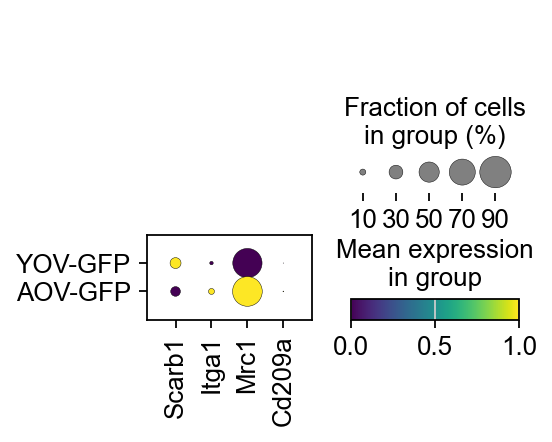

In [8]:
# Subset by condition
subset_adata = adata[adata.obs['condition'].isin(['YOV-GFP', 'AOV-GFP'])].copy()

# Further subset by cell types
Mesen = [
    "Lipid-Laden Macrophages",
    "Residence Macrophages/APC",
    "Pro-inflamatory Macrophages I",
    "Pro-inflamatory Macrophages II",
    "Monocytes/Macrophages",
]
subset_adata = subset_adata[subset_adata.obs['cell type'].isin(Mesen)].copy()

# Define the genes you want to check
genes_to_check = ['Scarb1', 'Itga1', 'Mrc1', 'Cd209a']

# Make sure all genes are present in the dataset
missing_genes = [gene for gene in genes_to_check if gene not in subset_adata.var_names]
if missing_genes:
    print(f"Warning: Missing genes {missing_genes}")

# Create the dot plot comparing expression between the two conditions for each cell type
sc.pl.dotplot(subset_adata, genes_to_check, groupby='condition', 
              standard_scale='var', 
              color_map='viridis', use_raw=False, 
              save='dotplot_genes_YOV_AOV_celltypes.png')

# Show the plot
plt.show()

In [10]:
# Check available genes in your dataset
print(subset_adata.var_names)


Index(['Xkr4', 'Gm1992', 'Gm19938', 'Rp1', 'Sox17', 'Gm37587', 'Mrpl15',
       'Lypla1', 'Tcea1', 'Rgs20',
       ...
       'AC132444.5', 'Csprs', 'Vamp7', 'Spry3', 'Tmlhe', 'CR974586.4',
       '4933409K07Rik', 'Gm10931', 'CAAA01147332.1', 'AC149090.1'],
      dtype='object', length=22591)


In [ ]:
# Set figure parameters
celltypePalette = {
    "Fibroadipogenic cells": '#9edae5',
    "Residence Macrophages/APC": '#17becf',
    "Neutrophils": '#c5b0d5',
    "Pro-inflamatory Macrophages II": '#1f77b4',
    "Endothelial cells": '#d62728',
    "Monocytes/Macrophages": '#8c564b',
    "Mature skeletal muscle": '#ff7f0e', 
    "Pro-inflamatory Macrophages I": '#ffcc00',  # Added color code
    "Lipid-Laden Macrophages": '#ffbb78', 
    "MuSCs and Myoblasts": '#2ca02c', 
    "MuSCs and progenitors": '#98df8a',
    "Myo-Fibroblast": '#9467bd',
    "Anti-inflammatory Macrophages": '#e377c2', 
    "Classical Dendritic cells": '#dbdb8d',
    "Pericyte cells": '#bcbd22',
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Proliferation": '#ff9896',
    "Bcells": '#aec7e8',
    "Tenocyte": '#f7b6d2',
    "Schwann cells": '#c49c94'
}

In [ ]:
 marker_genes_dict = {
        'Anti-inflammatory Macrophages/Monocyte cells': ['C1qa', 'Apoe', 'Cd14', 'Aif1'],
        'Monocytes/macrophages/Platelet': ['Cd68', 'Pf4', 'Cd38', 'Ms4a7'],
        'Myeloid-derived suppressor cells': ['S100a9', 'S100a8', 'Ly6g', 'Cd33'],
        'M2 Macrophages': ['Cd163', 'Lyve1', 'Mrc1', 'Folr2'],
        'Proinflammatory Macrophage/Monocyte cells': ['Ccl6', 'Cd14', 'Ccr2', 'Cd80'],
        'Residence M1 Macrophages/APC': ['Cd74', 'H2-Ab1', 'H2-Eb1', 'H2-DMb1'],
        'Proliferating immune cells': ['Cenpe', 'Top2a', 'Tk1', 'Tyms', 'Ube2c', 'Birc5', 'Stmn1'],
        'B- and T-lymphocytes and Natural killer cells': ['Cd3d', 'Cd3e', 'Nkg7', 'Tbx21'],
        'Proliferating macrophages': ['Top2a', 'Birc5', 'Pparg', 'Stmn1', ],
        'B cells': ['Ighd', 'Ly6d', 'Cd79a', 'Cd79b', 'Pax5',]
    }
    sc.pl.dotplot(adataVar5_subset, marker_genes_dict, groupby='cell_type_str', dendrogram=True, save='dotplot_Mesen.png')


In [ ]:
# Assuming adataVar5_subset is your subset AnnData object

# Customize UMAP plot with cell type coloring
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

# Show the UMAP plot
plt.show()

# Define the 'cell type' mapping dictionary
cell_type_mapping = {
    "0": "Fibroblast",
    "1": "MuSCs and Myoblasts",
    "2": "Endothelial cells",
    "3": "Anti-inflammatory Macrophages/Monocyte cells",
    "4": "Monocytes/macrophages/Platelet",
    "5": "Type IIB fiber",
    "6": "Type IIA",
    "7": "Myeloid-derived suppressor cells",
    "8": "Activated MuSCs and myogenic progenitor cells",
    "9": "M2 Macrophages",
    "10": "Proinflammatory Macrophage/Monocyte cells",
    "11": "Residence M1 Macrophages/APC",
    "12": "Proliferating immune cells",
    "13": "B- and T-lymphocytes and Natural killer cells",
    "14": "Proliferating macrophages",
    "15": "Pericyte cells",
    "16": "Myo-Fibroblast",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Endothelial cells"
}

# Convert 'leiden' values to string cell types
adataVar5_subset.obs['cell_type_str'] = adataVar5_subset.obs['leiden'].astype(str).map(cell_type_mapping)

# Print information about the subset size
print(f"Subset size: {len(adataVar5_subset)} cells")

# Check if the subset is not empty before division
if len(adataVar5_subset) > 0:
    # Plot UMAP with 'cell type' annotations and save the plot
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

    # Show the UMAP plot
    plt.show()

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    marker_genes_dict = {
        'Anti-inflammatory Macrophages/Monocyte cells': ['C1qa', 'Apoe', 'Cd14', 'Aif1'],
        'Monocytes/macrophages/Platelet': ['Cd68', 'Pf4', 'Cd38', 'Ms4a7'],
        'Myeloid-derived suppressor cells': ['S100a9', 'S100a8', 'Ly6g', 'Cd33'],
        'M2 Macrophages': ['Cd163', 'Lyve1', 'Mrc1', 'Folr2'],
        'Proinflammatory Macrophage/Monocyte cells': ['Ccl6', 'Cd14', 'Ccr2', 'Cd80'],
        'Residence M1 Macrophages/APC': ['Cd74', 'H2-Ab1', 'H2-Eb1', 'H2-DMb1'],
        'Proliferating immune cells': ['Cenpe', 'Top2a', 'Tk1', 'Tyms', 'Ube2c', 'Birc5', 'Stmn1'],
        'B- and T-lymphocytes and Natural killer cells': ['Cd3d', 'Cd3e', 'Nkg7', 'Tbx21'],
        'Proliferating macrophages': ['Top2a', 'Birc5', 'Pparg', 'Stmn1', ],
        'B cells': ['Ighd', 'Ly6d', 'Cd79a', 'Cd79b', 'Pax5',]
    }
    sc.pl.dotplot(adataVar5_subset, marker_genes_dict, groupby='cell_type_str', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No plots generated.")


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# Assuming adataVar5_subset is your subset AnnData object

# Customize UMAP plot with cell type coloring
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

# Show the UMAP plot
plt.show()

# Define the 'cell type' mapping dictionary
cell_type_mapping = {
    "0": "Fibroblast",
    "1": "MuSCs and Myoblasts",
    "2": "Endothelial cells",
    "3": "Anti-inflammatory Macrophages/Monocyte cells",
    "4": "Monocytes/macrophages/Platelet",
    "5": "Type IIB fiber",
    "6": "Type IIA",
    "7": "Myeloid-derived suppressor cells",
    "8": "Activated MuSCs and myogenic progenitor cells",
    "9": "M2 Macrophages",
    "10": "Proinflammatory Macrophage/Monocyte cells",
    "11": "Residence M1 Macrophages/APC",
    "12": "Proliferating immune cells",
    "13": "B- and T-lymphocytes and Natural killer cells",
    "14": "Proliferating macrophages",
    "15": "Pericyte cells",
    "16": "Myo-Fibroblast",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Endothelial cells"
}

# Convert 'leiden' values to string cell types
adataVar5_subset.obs['cell_type_str'] = adataVar5_subset.obs['leiden'].astype(str).map(cell_type_mapping)

# Print information about the subset size
print(f"Subset size: {len(adataVar5_subset)} cells")

# Check if the subset is not empty before division
if len(adataVar5_subset) > 0:
    # Plot UMAP with 'cell type' annotations and save the plot
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

    # Show the UMAP plot
    plt.show()

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    marker_genes_dict = {
        'Anti-inflammatory Macrophages/Monocyte cells': ['C1qa', 'Apoe', 'Cd14', 'Aif1'],
        'Monocytes/macrophages/Platelet': ['Cd68', 'Pf4', 'Cd38', 'Ms4a7'],
        'Myeloid-derived suppressor cells': ['S100a9', 'S100a8', 'Ly6g', 'Cd33'],
        'M2 Macrophages': ['Cd163', 'Lyve1', 'Mrc1', 'Folr2'],
        'Proinflammatory Macrophage/Monocyte cells': ['Ccl6', 'Cd14', 'Ccr2', 'Cd80'],
        'Residence M1 Macrophages/APC': ['Cd74', 'H2-Ab1', 'H2-Eb1', 'H2-DMb1'],
        'Proliferating immune cells': ['Cenpe', 'Top2a', 'Tk1', 'Tyms', 'Ube2c', 'Birc5', 'Stmn1'],
        'B- and T-lymphocytes and Natural killer cells': ['Cd3d', 'Cd3e', 'Nkg7', 'Tbx21'],
        'Proliferating macrophages': ['Top2a', 'Birc5', 'Pparg', 'Stmn1', ],
        'B cells': ['Ighd', 'Ly6d', 'Cd79a', 'Cd79b', 'Pax5',]
    }
    sc.pl.dotplot(adataVar5_subset, marker_genes_dict, groupby='cell_type_str', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No plots generated.")


In [ ]:
# Set figure parameters
celltypePalette = {
    "Fibroadipogenic cells": '#9edae5',
    "Residence Macrophages/APC": '#17becf',
    "Neutrophils": '#c5b0d5',
    "Pro-inflamatory Macrophages II": '#1f77b4',
    "Endothelial cells": '#d62728',
    "Monocytes/Macrophages": '#8c564b',
    "Mature skeletal muscle": '#ff7f0e', 
    "Pro-inflamatory Macrophages I": '#ffcc00',  # Added color code
    "Lipid-Laden Macrophages": '#ffbb78', 
    "MuSCs and Myoblasts": '#2ca02c', 
    "MuSCs and progenitors": '#98df8a',
    "Myo-Fibroblast": '#9467bd',
    "Anti-inflammatory Macrophages": '#e377c2', 
    "Classical Dendritic cells": '#dbdb8d',
    "Pericyte cells": '#bcbd22',
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Proliferation": '#ff9896',
    "Bcells": '#aec7e8',
    "Tenocyte": '#f7b6d2',
    "Schwann cells": '#c49c94'
}

# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=40, title='Clustering of Cells', save='umap_plot_color.png')
pl.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the map_condition function
def map_condition(x):
    if 'YSham' in x:
        return 'YSham'
    elif 'ASham' in x:
        return 'ASham'
    elif 'YOV' in x:
        return 'YOV'
    else:
        return 'AOV'

# Apply the map_condition function
adata.obs['condition'] = adata.obs['Sample'].map(map_condition)

# Grouping by condition and cell type to get cell type counts
cell_type_counts = adata.obs.groupby(['condition', 'cell type']).size().reset_index(name='count')

# Adding total cell counts for each condition
total_cells = adata.obs.groupby('condition').size().reset_index(name='total_cells')
total_cells_dict = dict(zip(total_cells['condition'], total_cells['total_cells']))
cell_type_counts['total_cells'] = cell_type_counts['condition'].map(total_cells_dict)

# Ensure the total_cells column is numeric
cell_type_counts['total_cells'] = cell_type_counts['total_cells'].astype(int)

# Calculating the frequency of each cell type in each condition (normalization step)
cell_type_counts['frequency'] = cell_type_counts['count'] / cell_type_counts['total_cells']

# Set figure parameters
celltypePalette = {
    "Mature skeletal muscle": '#ff7f0e',
    "MuSCs and progenitors": '#2ca02c',
    "Fibroadipogenic cells": '#9467bd',
    "Immune cells":'#17becf',
    "Endothelial cells": '#d62728',
    "Pericyte cells": '#bcbd22',
    "Schwann cells": '#c49c94',
    "Proliferation": '#ff9896',
    "Tenocyte": '#f7b6d2',
}

# Define the order of samples in the plot
sample_order = ['YSham', 'ASham', 'YOV', 'AOV']

# Ensure 'condition' column is categorized to maintain the specified order
cell_type_counts['condition'] = pd.Categorical(cell_type_counts['condition'], categories=sample_order, ordered=True)

# Pivot the DataFrame for a stacked bar plot
stacked_data = cell_type_counts.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Create a DataFrame for custom x-axis labels
labels = ['Young', 'Old', 'Young', 'Old']

# Set the figure size larger to accommodate longer labels
plt.figure(figsize=(14, 10))

# Create a stacked bar plot with specific colors for each cell type
ax = stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette.get(x, '#333333') for x in stacked_data.columns], ax=plt.gca())

# Set plot properties
plt.ylabel('Frequency')
plt.title('Cell Type Frequencies in Different Conditions')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the legend

# Set custom x-axis labels
ax.set_xticklabels(labels, rotation=0, ha='center')

# Add annotations for Sham and OV covering both Young and Old
ax.annotate('Sham', xy=(0.5, -0.1), xycoords='axes fraction', ha='center', va='top', fontsize=12, weight='bold')
ax.annotate('OV', xy=(1.5, -0.1), xycoords='axes fraction', ha='center', va='top', fontsize=12, weight='bold')

# Add lines to separate Sham and OV sections
plt.axvline(x=1.5, color='black', linestyle='--', linewidth=1)

# Draw horizontal lines and annotations for Sham and OV
plt.axhline(y=-0.12, xmin=-0.1, xmax=1.1, color='black', linestyle='--', linewidth=1)
plt.axhline(y=-0.12, xmin=1.1, xmax=2.1, color='black', linestyle='--', linewidth=1)

# Move the legend to the top right side
plt.legend(title='Cell Type', bbox_to_anchor=(1.25, 1), loc='upper left')

# Remove the x-axis label
ax.set_xlabel('')

# Show the plot
plt.show()


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt




#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()





# Assuming adataVar5_subset is your subset AnnData object

# Customize UMAP plot with cell type coloring
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

# Show the UMAP plot
plt.show()

# Define the 'cell type' mapping dictionary
cell_type_mapping = {
    "0": "Fibroblast",
    "1": "MuSCs and Myoblasts",
    "2": "Endothelial cells",
    "3": "Anti-inflammatory Macrophages/Monocyte cells",
    "4": "Monocytes/macrophages/Platelet",
    "5": "Type IIB fiber",
    "6": "Type IIA",
    "7": "Myeloid-derived suppressor cells",
    "8": "Activated MuSCs and myogenic progenitor cells",
    "9": "M2 Macrophages",
    "10": "Proinflammatory Macrophage/Monocyte cells",
    "11": "Residence M1 Macrophages/APC",
    "12": "Proliferating immune cells",
    "13": "B- and T-lymphocytes and Natural killer cells",
    "14": "Proliferating macrophages",
    "15": "Pericyte cells",
    "16": "Myo-Fibroblast",
    "17": "Tenocyte",
    "18": "B cells",
    "19": "Schwann cells",
    "20": "Endothelial cells"
}

# Convert 'leiden' values to string cell types
adataVar5_subset.obs['cell_type_str'] = adataVar5_subset.obs['leiden'].astype(str).map(cell_type_mapping)

# Print information about the subset size
print(f"Subset size: {len(adataVar5_subset)} cells")

# Check if the subset is not empty before division
if len(adataVar5_subset) > 0:
    # Plot UMAP with 'cell type' annotations and save the plot
    sc.set_figure_params(figsize=(10, 10))
    sc.pl.umap(adataVar5_subset, color=['cell_type_str'], frameon=False, save='umap_plot_Mesen.png')

    # Show the UMAP plot
    plt.show()

    # Plot and save the dot plot
    sc.set_figure_params(figsize=(10, 10))
    marker_genes_dict = {
        'Anti-inflammatory Macrophages/Monocyte cells': ['C1qa', 'Apoe', 'Cd14', 'Aif1'],
        'Monocytes/macrophages/Platelet': ['Cd68', 'Pf4', 'Cd38', 'Ms4a7'],
        'Myeloid-derived suppressor cells': ['S100a9', 'S100a8', 'Ly6g', 'Cd33'],
        'M2 Macrophages': ['Cd163', 'Lyve1', 'Mrc1', 'Folr2'],
        'Proinflammatory Macrophage/Monocyte cells': ['Ccl6', 'Cd14', 'Ccr2', 'Cd80'],
        'Residence M1 Macrophages/APC': ['Cd74', 'H2-Ab1', 'H2-Eb1', 'H2-DMb1'],
        'Proliferating immune cells': ['Cenpe', 'Top2a', 'Tk1', 'Tyms', 'Ube2c', 'Birc5', 'Stmn1'],
        'B- and T-lymphocytes and Natural killer cells': ['Cd3d', 'Cd3e', 'Nkg7', 'Tbx21'],
        'Proliferating macrophages': ['Top2a', 'Birc5', 'Pparg', 'Stmn1', ],
        'B cells': ['Ighd', 'Ly6d', 'Cd79a', 'Cd79b', 'Pax5',]
    }
    sc.pl.dotplot(adataVar5_subset, marker_genes_dict, groupby='cell_type_str', dendrogram=True, save='dotplot_Mesen.png')

    # Show the dot plot
    plt.show()
else:
    print("Warning: Subset is empty. No plots generated.")


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you have seaborn installed for better heatmap visualization

# Your cell_type dictionary
cell_type = {
    "0": "C1q+ M2-like macrophages",
    "1": "Fibroadipogenic cells 1",
    # ... (rest of your cell types)
}

# Convert 'leiden' values to string cell types
adata.obs['cell type'] = adata.obs['leiden'].astype(str).map(cell_type)

# Define the desired cell types for subsetting
Mesen = [
    "C1q+ M2-like macrophages",
    "Monocytes/Spp1+ macrophages/Platelet",
    "Monocyte/Residence Macrophages/APC",
    "Neutrophils",
    "M2 Macrophages",
    "T-lymphocytes and Natural killer cells",
    "B cells",
    "Neutrophils, like monocytes",
]

# Filter cells based on the 'cell type' annotation using string values
adata_subset = adata[adata.obs['cell type'].isin(Mesen)]

# Print information about the subset size
print(f"Subset size: {len(adata_subset)} cells")

# Check if the subset is not empty before plotting
if len(adata_subset) > 0:
    # Create a heatmap with the 'viridis' colormap
    ax = sc.pl.heatmap(adata_subset, n_genes=5, groupby='cell type', cmap='viridis', dendrogram=True, swap_axes=True)
    plt.show()
else:
    print("Warning: Subset is empty. No heatmap generated.")


In [ ]:
import scanpy as sc
import pandas as pd

# Original cell type mapping
original_cell_type = {
    "0": "Fibroadipogenic cells",
    "1": "Neutrophils",
    "2": "Lipid-Laden Macrophages",
    "3": "Residence Macrophages/APC 1",
    "4": "Anti-inflammatory Macrophages 2",
    "5": "Endothelial cells 1",
    "6": "Mature skeletal muscle",
    "7": "Endothelial cells 2",
    "8": "Pro-inflammatory Macrophages",
    "9": "Anti-inflammatory Macrophages 1",
    "10": "MuSCs and progenitors",
    "11": "Myo-Fibroblast",
    "12": "Perivascular Macrophages",
    "13": "Residence Macrophages/APC 2",
    "14": "Monocytes/Macrophages",
    "15": "Pericyte cells",
    "16": "T-lymphocytes and NKCs",
    "17": "Proliferation",
    "18": "Bcells",
    "19": "Schwann cells",
    "20": "Erythroid-like cells",
}

# Merged cell type mapping
merged_cell_type = {
    "0": "Fibroadipogenic cells",
    "1": "Immune cells",
    "2": "Immune cells",
    "3": "Immune cells",
    "4": "Immune cells",
    "5": "Endothelial cells",
    "6": "Mature skeletal muscle",
    "7": "Endothelial cells",
    "8": "Immune cells",
    "9": "Immune cells",
    "10": "MuSCs and progenitors",
    "11": "Fibroadipogenic cells",
    "12": "Immune cells",
    "13": "Immune cells",
    "14": "Immune cells",
    "15": "Pericyte cells",
    "16": "Immune cells",
    "17": "Proliferation",
    "18": "Immune cells",
    "19": "Schwann cells",
    "20": "Erythroid-like cells",
}

# Check if adata and 'leiden' column exist and are not None
if adata is not None and 'leiden' in adata.obs.columns and adata.obs['leiden'] is not None:
    # Convert 'leiden' column to 'category' dtype
    adata.obs['leiden'] = adata.obs['leiden'].astype('category')
    
    # Update 'leiden' with the merged cell types
    adata.obs['leiden'] = adata.obs['leiden'].map(original_cell_type)

    # Ensure 'leiden' is converted to 'category' dtype
    adata.obs['leiden'] = adata.obs['leiden'].astype('category')

    # Update 'leiden' with the merged cell types
    adata.obs['leiden'] = adata.obs['leiden'].map(merged_cell_type)

    # Find markers/label cell types
    sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

    # Plot ranked genes groups
    sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

    # Dotplot for visualization of marker genes
    sc.pl.dotplot(adata, marker_genes_dict=None, groupby='leiden', dendrogram=False)
else:
    print("The 'leiden' column does not exist or is None in the AnnData object.")
